In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [ ]:
#indexs = ['^SPGSIN']

In [15]:
df = pd.read_excel("commodities.xlsx", parse_dates= ["Date"], index_col = "Date",usecols = "A, C")

In [20]:
df.index

DatetimeIndex(['1986-02-28', '1986-03-31', '1986-04-30', '1986-05-30',
               '1986-06-30', '1986-07-31', '1986-08-29', '1986-09-30',
               '1986-10-31', '1986-11-28',
               ...
               '2019-03-29', '2019-04-30', '2019-05-31', '2019-06-28',
               '2019-07-31', '2019-08-30', '2019-09-30', '2019-10-31',
               '2019-11-29', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=407, freq=None)

In [ ]:
#start_date = 

In [ ]:
#df = pd.DataFrame()

#for index in indexs: 
    
   #df[index] = yf.download(index,start='2010-01-01')['Adj Close']

#df.head()

In [21]:
annual = df.resample('A', kind='period').last()
annual.head()


,SPGSIN Index
Date,
1986,95.85
1987,199.69
1988,212.38
1989,168.16
1990,184.68


In [22]:
annual["Return"] = np.log(annual / annual.shift())
annual.dropna(inplace=True)
annual.head()

,SPGSIN Index,Return
Date,,
1987,199.69,0.733982
1988,212.38,0.061611
1989,168.16,-0.233461
1990,184.68,0.093709
1991,145.78,-0.236526


In [23]:
annual.index.size

33

In [24]:
windows = [year for year in range(annual.index.size, 0, -1)]
windows

[33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [25]:
for year in windows:
    annual["{}Y".format(year)] = annual.iloc[:,1].rolling(year).mean()


In [26]:
annual

,SPGSIN Index,Return,33Y,32Y,31Y,30Y,29Y,28Y,27Y,26Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1987,199.69,0.733982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733982
1988,212.38,0.061611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397796,0.061611
1989,168.16,-0.233461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187377,-0.085925,-0.233461
1990,184.68,0.093709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.163960,-0.026047,-0.069876,0.093709
1991,145.78,-0.236526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.083863,-0.078667,-0.125426,-0.071409,-0.236526
1992,153.50,0.051602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.078486,-0.052613,-0.081169,-0.030405,-0.092462,0.051602
1993,132.49,-0.147193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.046246,-0.068376,-0.094374,-0.059602,-0.110706,-0.047796,-0.147193
1994,217.93,0.497667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.102674,0.012487,0.004299,0.051852,0.041387,0.134025,0.175237,0.497667
1995,193.32,-0.119827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.077951,-0.004052,-0.013433,0.023238,0.009144,0.070562,0.076882,0.188920,-0.119827


In [27]:
triangle = annual.drop(columns = annual.iloc[:,[0,1]])

In [28]:
triangle

,33Y,32Y,31Y,30Y,29Y,28Y,27Y,26Y,25Y,24Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733982
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397796,0.061611
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187377,-0.085925,-0.233461
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.163960,-0.026047,-0.069876,0.093709
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.083863,-0.078667,-0.125426,-0.071409,-0.236526
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.078486,-0.052613,-0.081169,-0.030405,-0.092462,0.051602
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.046246,-0.068376,-0.094374,-0.059602,-0.110706,-0.047796,-0.147193
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.102674,0.012487,0.004299,0.051852,0.041387,0.134025,0.175237,0.497667
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.077951,-0.004052,-0.013433,0.023238,0.009144,0.070562,0.076882,0.188920,-0.119827


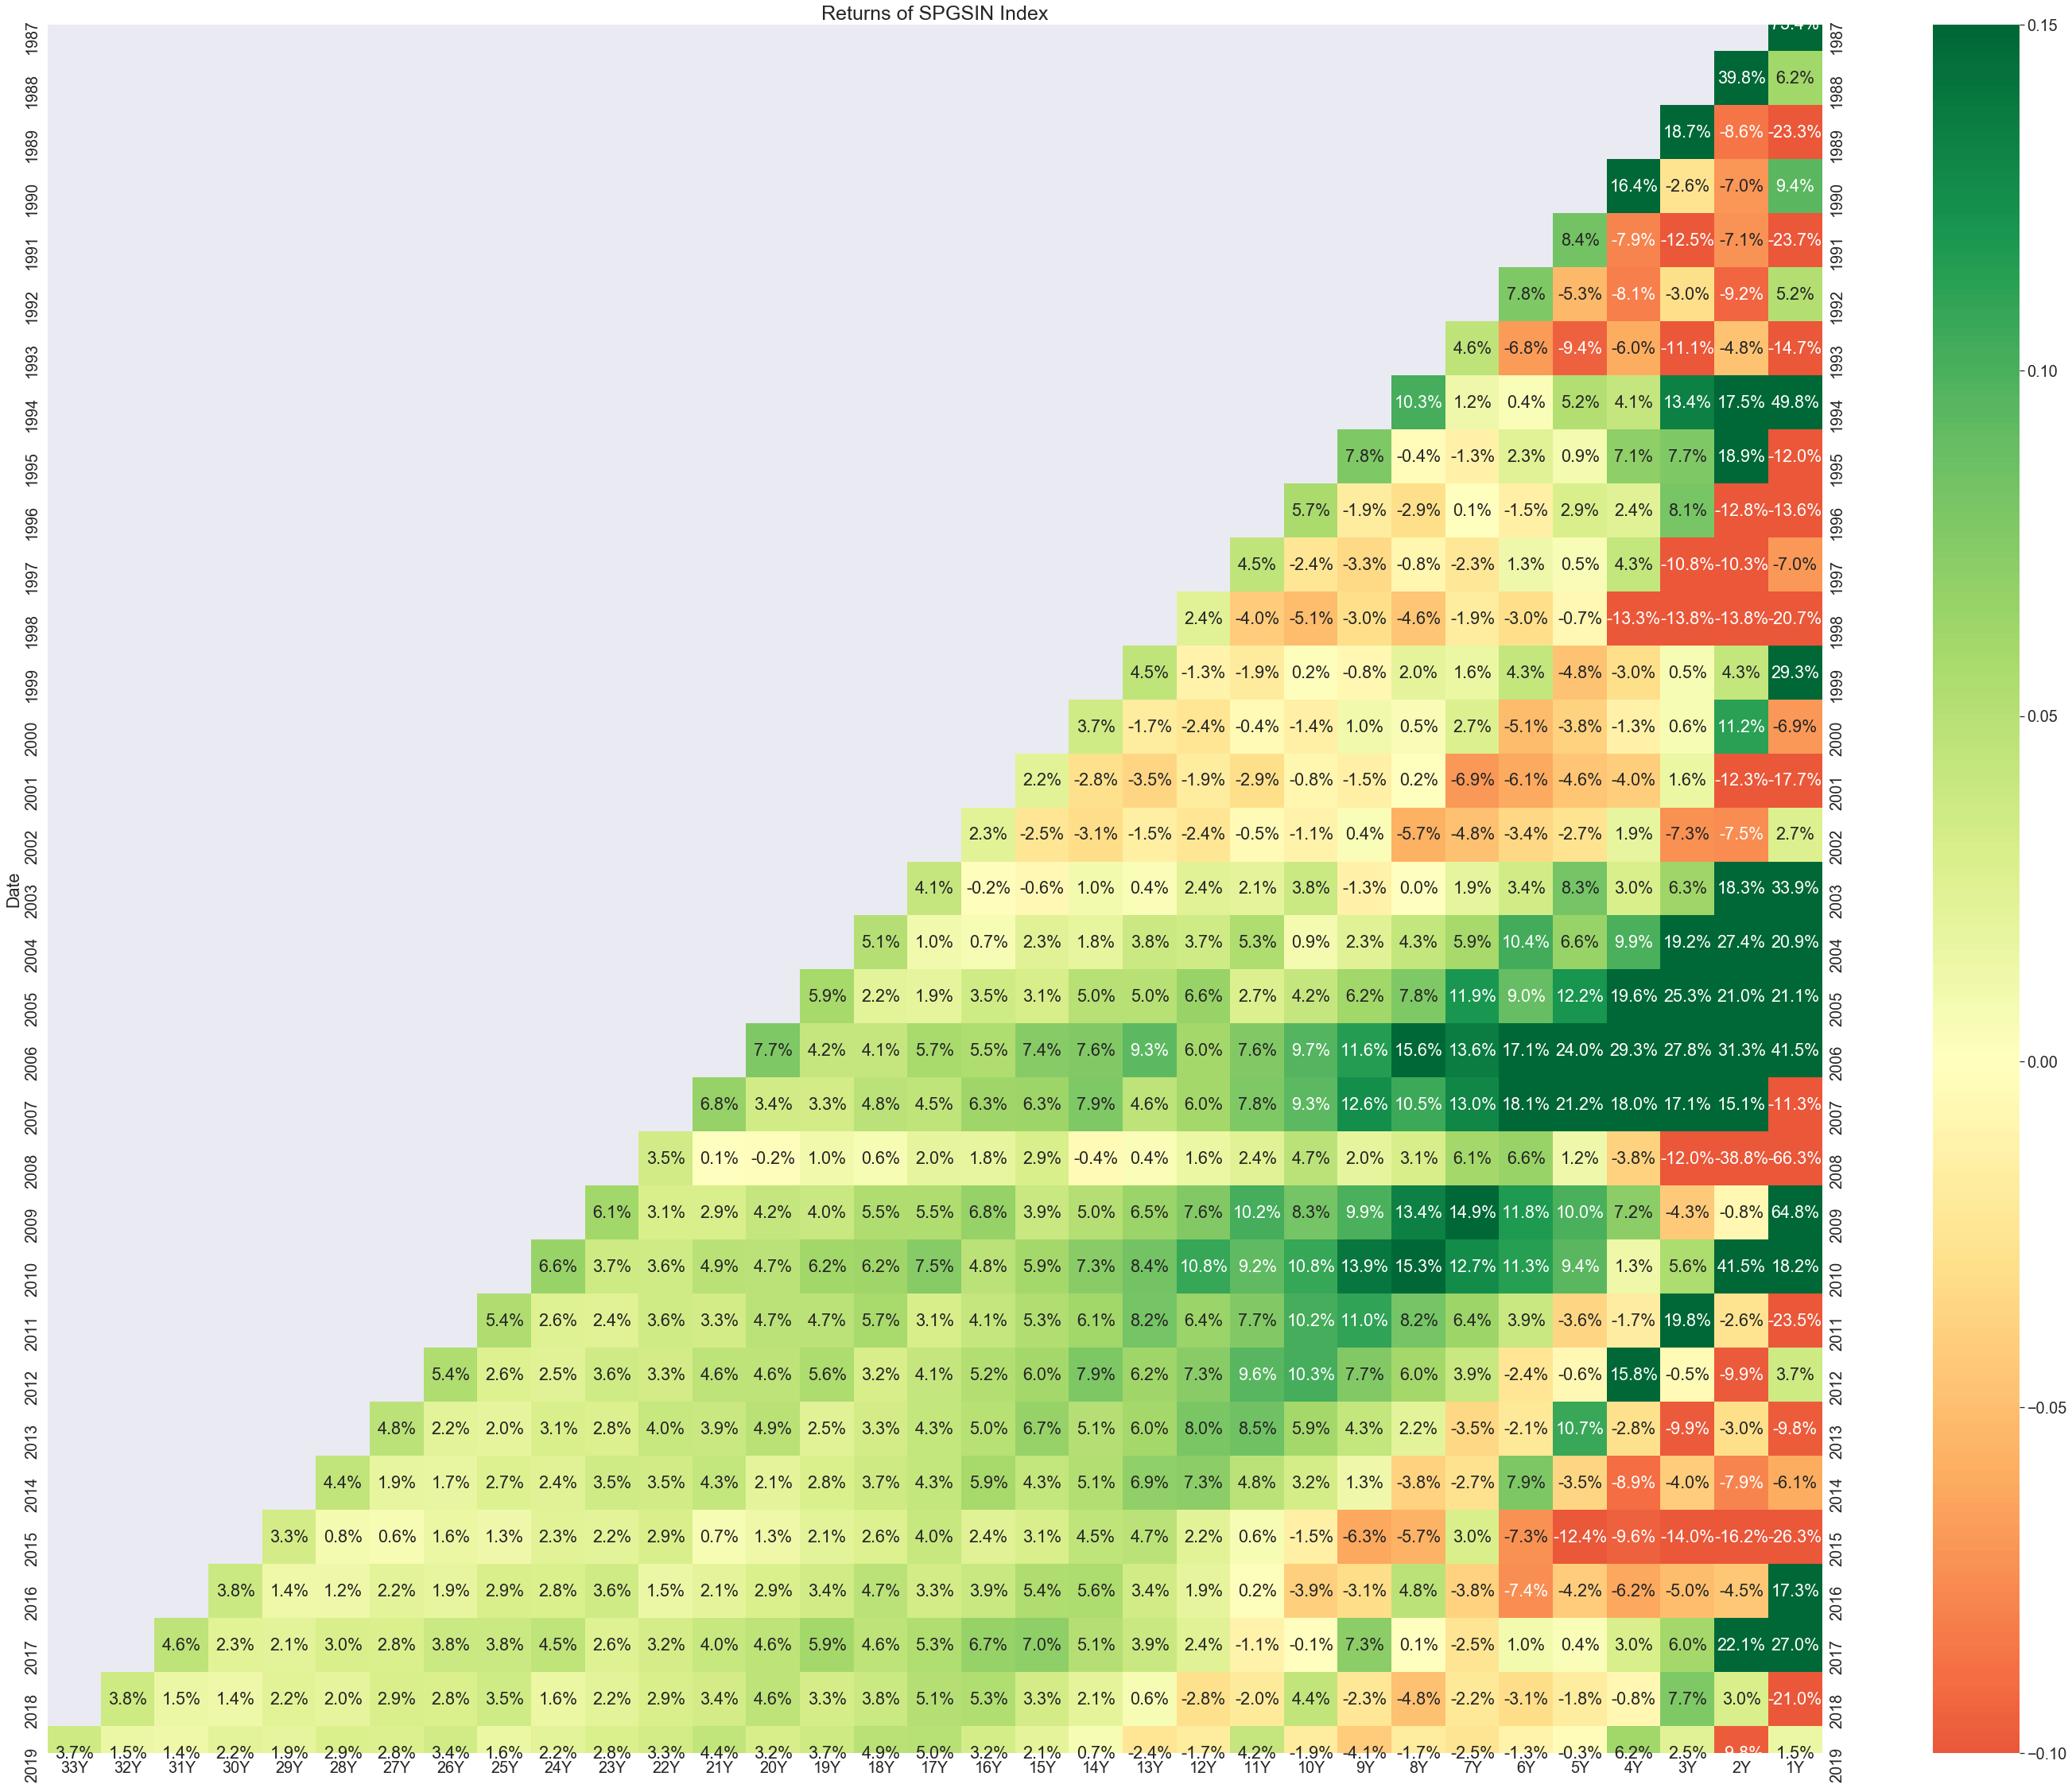

In [33]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.title('Returns of SPGSIN Index', fontsize = 25)#'Returns of {} index'.format(indexs), fontsize = 25 )

plt.savefig('SPGSIN.pdf')
plt.show()


In [34]:
df2 = pd.read_excel("commodities.xlsx", parse_dates= ["Date"], index_col = "Date",usecols = "A, C")

In [35]:
df2.head()

,SPGSIN Index
Date,
1986-02-28,101.57
1986-03-31,103.68
1986-04-30,98.20
1986-05-30,98.90
1986-06-30,94.59


In [37]:
df2.index.size


407

In [43]:
df2.columns = ['SPGSIN']

In [44]:
df2.head()

,SPGSIN
Date,
1986-02-28,101.57
1986-03-31,103.68
1986-04-30,98.20
1986-05-30,98.90
1986-06-30,94.59


In [46]:
df2['SMA']=df2.SPGSIN.rolling(window = 50).mean()
df2['EMA'] = df2.SPGSIN.ewm(span = 50,min_periods=50).mean()
df2


,SPGSIN,SMA,EMA
Date,,,
1986-02-28,101.57,NaN,NaN
1986-03-31,103.68,NaN,NaN
1986-04-30,98.20,NaN,NaN
1986-05-30,98.90,NaN,NaN
1986-06-30,94.59,NaN,NaN
...,...,...,...
2019-08-30,317.54,319.6326,335.021673
2019-09-30,319.66,320.4730,334.419254
2019-10-31,324.58,321.4946,334.033401


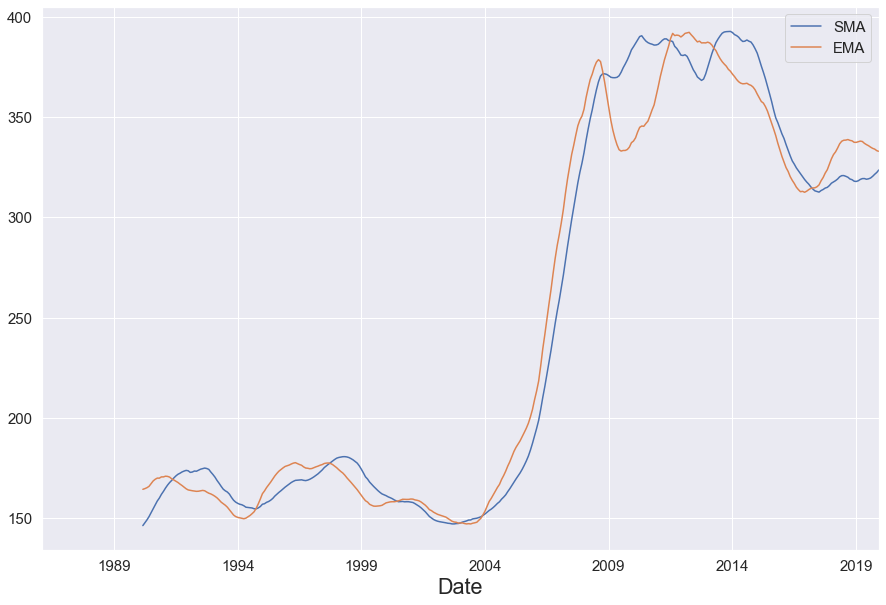

In [47]:
df2.iloc[:,-2:].plot(figsize=(15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [48]:
df2['EXP']= df2.SPGSIN.expanding(min_periods = 1).mean()

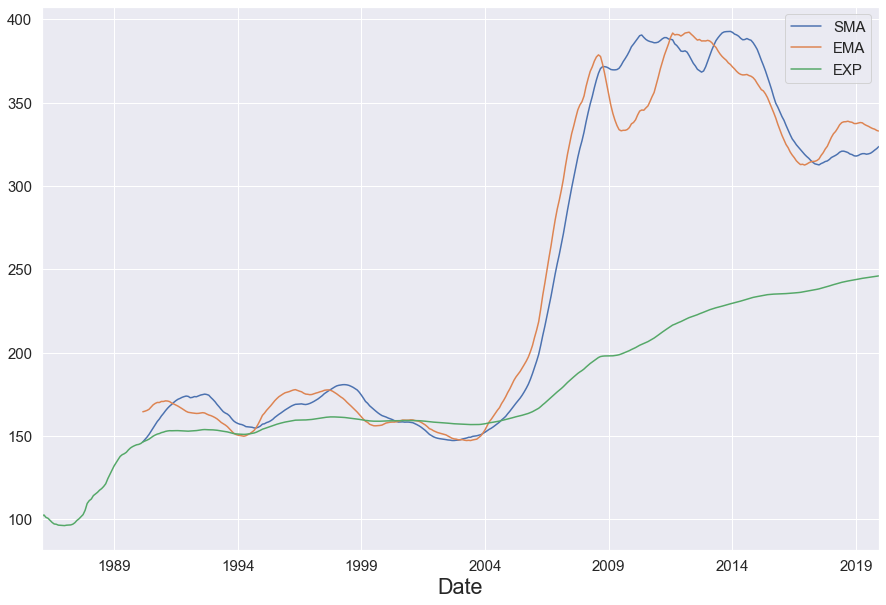

In [49]:
df2.iloc[:,-3:].plot(figsize=(15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

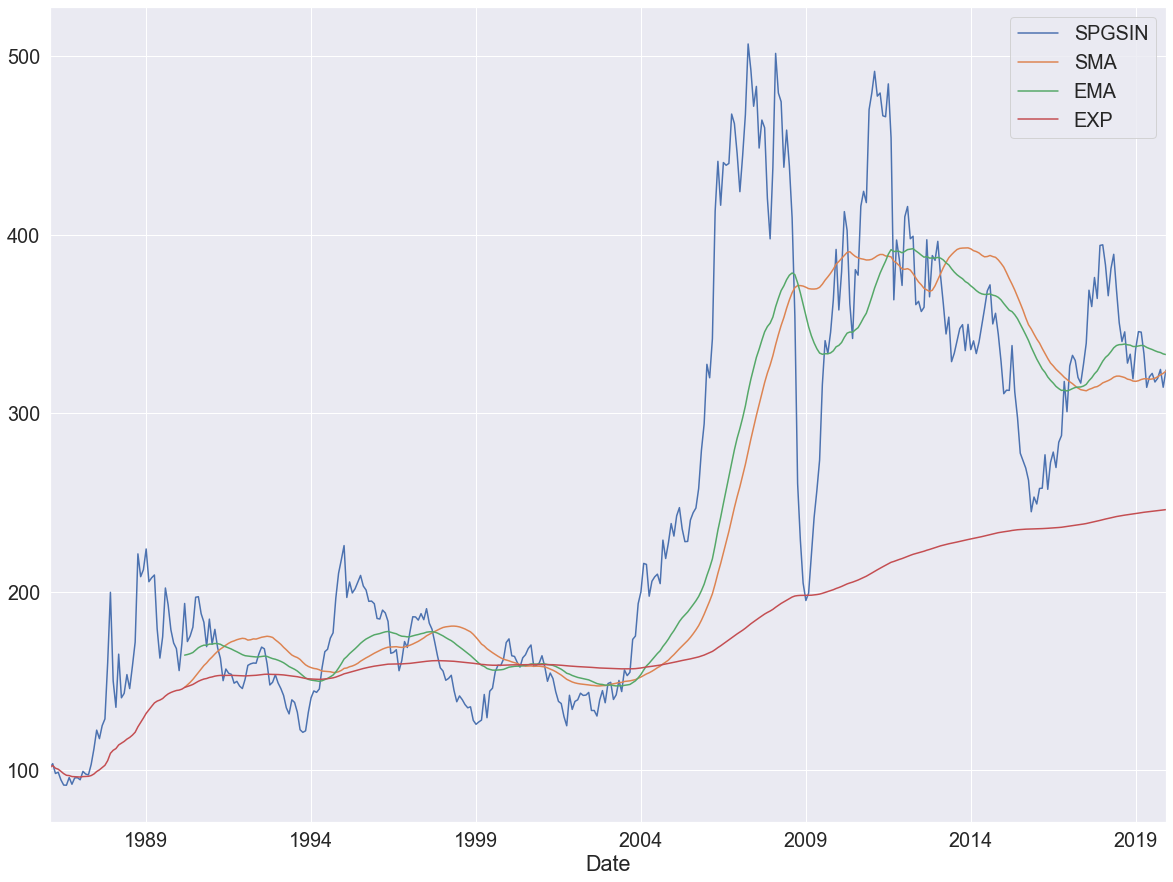

In [52]:
df2.plot(figsize=(20,15))
plt.show()